RMSE for lambda = 1 is 0.1719165822190066
RMSE for lambda = 10 is 0.6234831390833789
RMSE for lambda = 100 is 0.9481372855767648


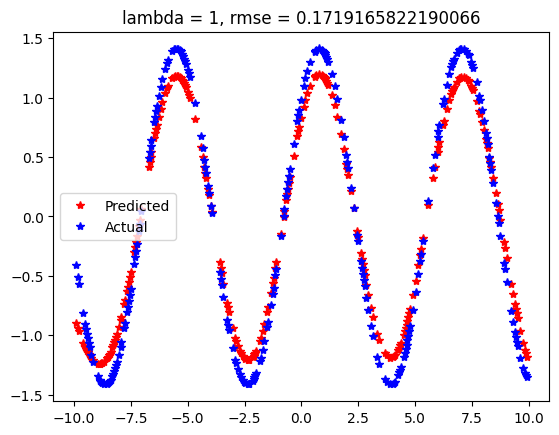

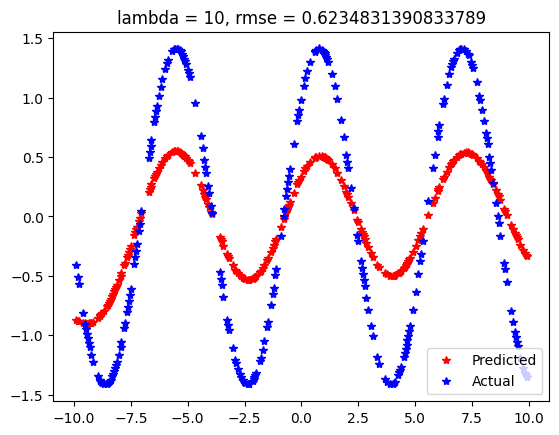

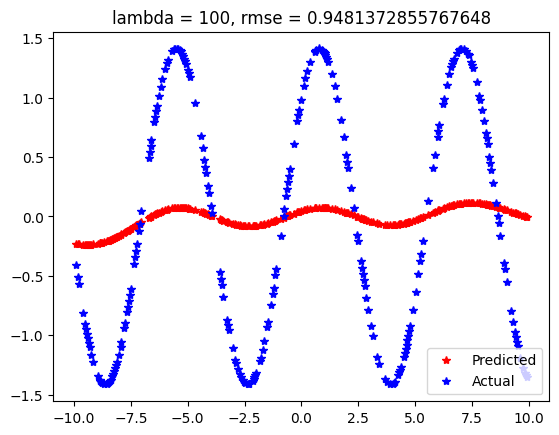

In [1]:
#For kernel ridge regression
import numpy as np
import matplotlib.pyplot as plt
def load_data(loc):
    train = np.genfromtxt(loc+'/ridgetrain.txt', delimiter='  ')
    test = np.genfromtxt(loc+'/ridgetrain.txt', delimiter='  ')
    return train[:,0], train[:,1], test[:,0], test[:,1]

def kernel(x, y):
    return np.exp(-0.1 * np.square(x.reshape((-1,1)) - y.reshape((1,-1))))

x_train, y_train, x_test, y_test = load_data('data')
K = kernel(x_train, x_train)
Lambda = [ 1, 10, 100]
In = np.eye(x_train.shape[0])

for l in Lambda:
    alpha = np.dot(np.linalg.inv(K + l * In), y_train.reshape((-1,1)))
    K_test = kernel(x_train, x_test)
    y_pred = (np.dot(alpha.T, K_test)).reshape((-1,1))

    rmse = np.sqrt(np.mean(np.square(y_test.reshape((-1,1)) - y_pred)))
    print('RMSE for lambda = ' + str(l) + ' is ' + str(rmse))

    plt.figure()
    plt.title('lambda = ' + str(l) + ', rmse = ' + str(rmse))
    plt.plot(x_test, y_pred, 'r*', label='Predicted')
    plt.plot(x_test, y_test, 'b*', label='Actual')
    plt.legend()

plt.show()

RMSE for lambda = 2 is 0.9710871642179957
RMSE for lambda = 5 is 0.9490385592531062
RMSE for lambda = 20 is 0.14235655739101033
RMSE for lambda = 50 is 0.08871904284965443
RMSE for lambda = 100 is 0.06584583758969242


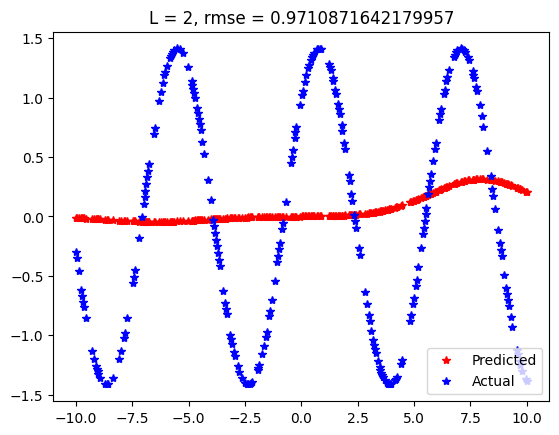

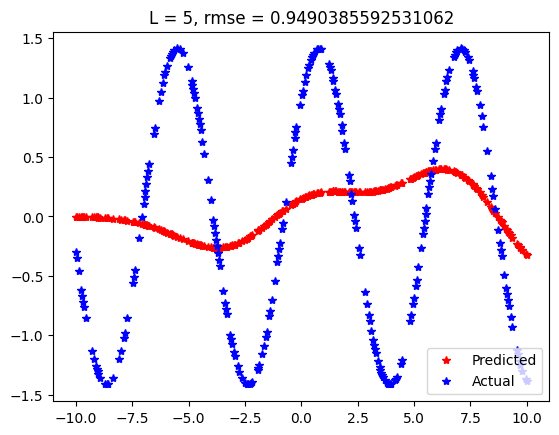

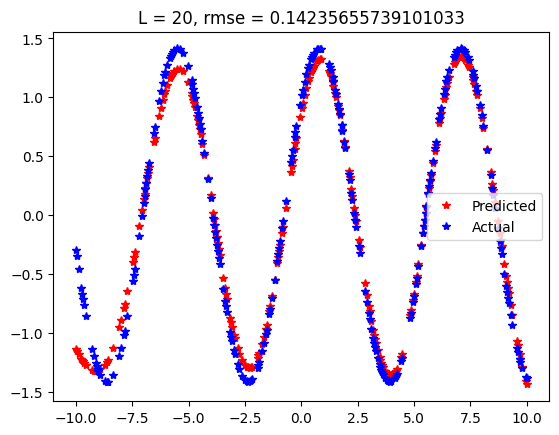

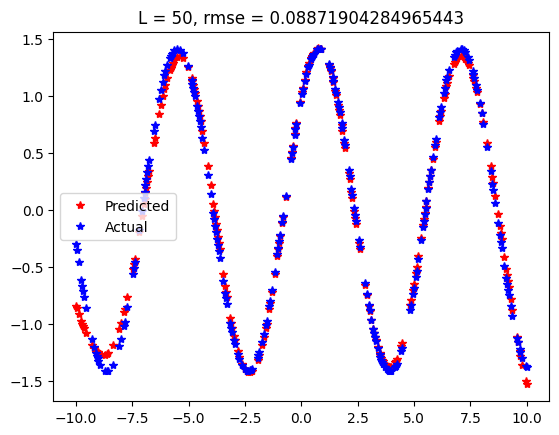

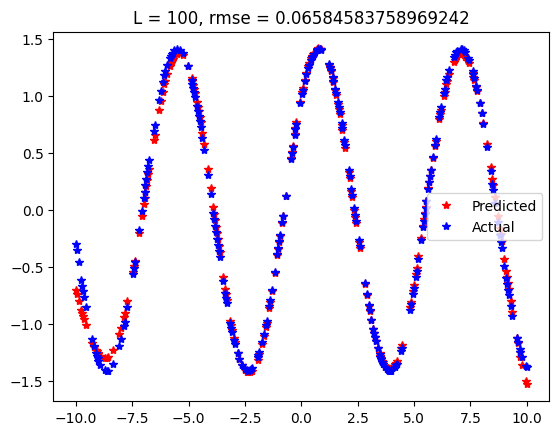

In [2]:
#For landmark-ridge
import numpy as np
import matplotlib.pyplot as plt

def load_data(loc):
    train = np.genfromtxt(loc+'/ridgetrain.txt', delimiter='  ')
    test = np.genfromtxt(loc+'/ridgetest.txt', delimiter='  ')
    return train[:,0], train[:,1], test[:,0], test[:,1]

def landmark(x, y):
    return np.exp(-0.1 * np.square(x.reshape((-1,1)) - y.reshape((1,-1))))

x_train, y_train, x_test, y_test = load_data('data')

iter_vals = [2, 5, 20, 50, 100]

for L in iter_vals:
    z = np.random.choice(x_train, L, replace=False)
    Id = np.eye(L)
    xf_train = landmark(x_train, z)

    W = np.dot(np.linalg.inv(np.dot(xf_train.T, xf_train) + 0.1*Id), np.dot(xf_train.T, y_train.reshape((-1,1))))

    xf_test = landmark(x_test, z)

    y_pred = np.dot(xf_test, W)

    rmse = np.sqrt(np.mean(np.square(y_test.reshape((-1,1)) - y_pred)))
    print('RMSE for lambda = ' + str(L) + ' is ' + str(rmse))

    plt.figure()
    plt.title('L = ' + str(L) + ', rmse = ' + str(rmse))
    plt.plot(x_test, y_pred, 'r*', label='Predicted')
    plt.plot(x_test, y_test, 'b*', label='Actual')
    plt.legend()

plt.show()
